# Binary Classification using Keras

1.   Objective
In this Notebook, Binary Classification is performed **to predict whether a person has a heart disease or not.**
There are 2 classes:

*   Heart Disease Present (target=1)
*   Heart Disease Not Present (target=1)


2.   Dataset Reference -
  https://archive.ics.uci.edu/dataset/45/heart+disease



# Importing the Libraries

In [ ]:
# Import the Libraries
import warnings
warnings.filterwarnings('ignore')

import tensorflow  as tf

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
# Check the TensorFlow and Keras Versions
print("Tensorflow Version:: ",tf.__version__)
print("Keras Version:: ",tf.keras.__version__)

Tensorflow Version::  2.18.0
Keras Version::  3.8.0


In [ ]:
# Load the dataset
heart_disease_csv = pd.read_csv("sample_data/heart.csv")

In [ ]:
heart_disease_csv.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
# Check the shape of the dataset
heart_disease_csv.shape

(1025, 14)

In [ ]:
# Check the info of the dataset
heart_disease_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


# Prepare the dataset

In [ ]:
# Input Variables or Features
X = heart_disease_csv.drop("target",axis=1)

# Target Variable
y = heart_disease_csv["target"]

In [ ]:
# Import Libraries for Splitting dataset into train and test split
from sklearn.model_selection import train_test_split

In [ ]:
# Splitting the dataset into train = 80 % and test = 20%
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
# Check the shape of the X_train and X_test
X_train.shape, X_test.shape

((820, 13), (205, 13))

# Building a Binary Classification Neural Network

In [ ]:
# Import a Neural Network for Binary Classification
# Import Libraries for building sequential model with dense layer

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [ ]:
# Defining the sequential model
model = Sequential()

In [ ]:
# Adding input layer and passing features to it
input_dims = X_train.shape[1]
model.add(tf.keras.Input(shape=(input_dims,),name="Input Layer"))

In [ ]:
# Adding 3 dense layer one by one with activation function
model.add(Dense(32,activation="relu",name="Hidden_Layer1"))
model.add(Dense(16,activation="relu",name="Hidden_Layer2"))
model.add(Dense(8,activation="relu",name="Hidden_Layer3"))

In [ ]:
# Adding an output Layer
model.add(Dense(1,activation="sigmoid",name="Output_Layer"))

In [ ]:
# Find the model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Hidden_Layer1 (Dense)           │ (None, 32)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_Layer2 (Dense)           │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_Layer3 (Dense)           │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_Layer (Dense)            │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,121 (4.38 KB)

 Trainable params: 1,121 (4.38 KB)

 Non-trainable params: 0 (0.00 B)

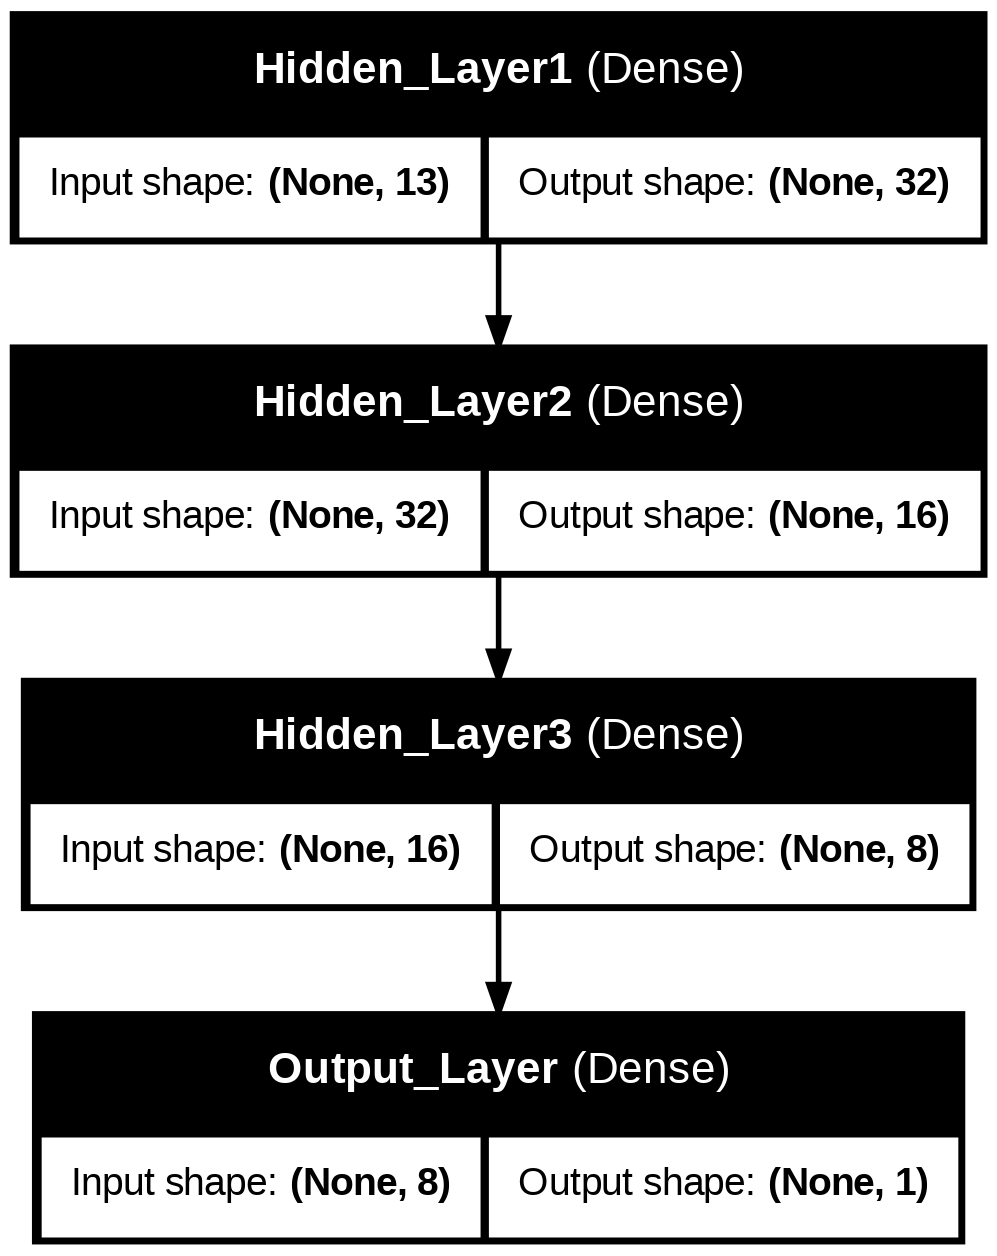

In [ ]:
# Plotting the model
from tensorflow.keras.utils import plot_model
plot_model(model,show_shapes=True,show_layer_names=True)

# Compile a Neural Network

In [ ]:
# Import the Optimizer
from tensorflow.keras.optimizers import RMSprop

In [ ]:
# define the optimizer
optimizer = RMSprop(learning_rate=0.001)

In [ ]:
# compile the model
model.compile(optimizer=optimizer,loss="binary_crossentropy",metrics=["accuracy"])

# Training a Neural Network

In [ ]:
# define the batch size and number of epochs
batch_size = 128
epochs = 20

# Fit a Neural Network or train a Neural Network
Binaryclass_classifier = model.fit(X_train,y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(X_test,y_test))

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 154ms/step - accuracy: 0.4820 - loss: 22.0983 - val_accuracy: 0.5024 - val_loss: 4.3702
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5816 - loss: 2.2085 - val_accuracy: 0.6390 - val_loss: 0.6447
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6391 - loss: 0.6883 - val_accuracy: 0.6390 - val_loss: 0.7983
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6212 - loss: 0.7492 - val_accuracy: 0.6439 - val_loss: 0.6198
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6720 - loss: 0.6299 - val_accuracy: 0.6098 - val_loss: 0.6862
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6008 - loss: 0.8191 - val_accuracy: 0.7268 - val_loss: 0.6363
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7153 - loss: 0.6221 - val_accuracy: 0.5707 - val_loss: 0.9277
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5968 - loss: 0.8449 - val_accuracy: 0.6537 - val_loss: 0.579

# Evaluate a trained network

In [ ]:
# Evaluating our neural network using test dataset
score = model.evaluate(X_test,y_test,verbose=1)
print("Test Score:",score[0])
print("Test Accuracy:",score[1])

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6540 - loss: 0.6850 
Test Score: 0.6914971470832825
Test Accuracy: 0.6487804651260376


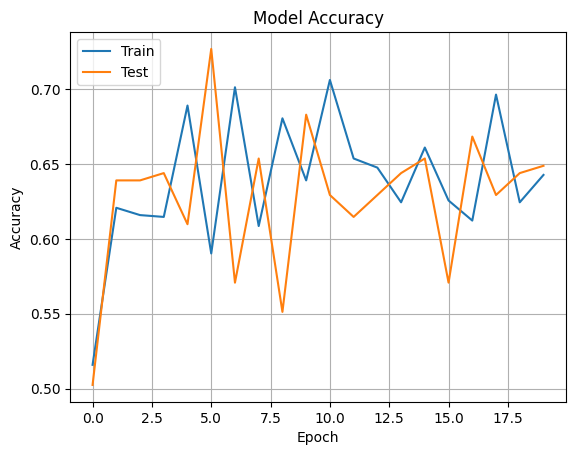

In [ ]:
# Plot training accuracy and validation accuracy
plt.plot(Binaryclass_classifier.history['accuracy'])
plt.plot(Binaryclass_classifier.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.grid()
plt.show()

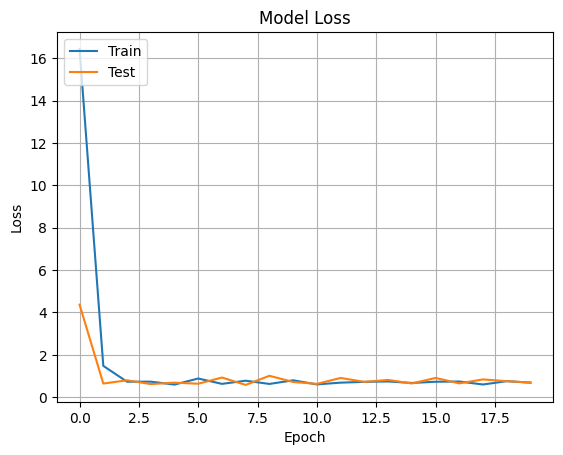

In [ ]:
# Plot training loss and validation loss
plt.plot(Binaryclass_classifier.history['loss'])
plt.plot(Binaryclass_classifier.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.grid()
plt.show()

# Inference or Prediction using trained neural network

In [ ]:
# Prediction on test dataset using predict() method
y_pred = model.predict(X_test)
y_pred[:10]

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


array([[0.48857558],
       [0.12133694],
       [0.06405334],
       [0.4380839 ],
       [0.1488344 ],
       [0.02443409],
       [0.00769667],
       [0.20226854],
       [0.807016  ],
       [0.16341163]], dtype=float32)

In [ ]:
# Decision Boundary Threshold, if probability > 0.5 then heart disease is present else heart disease is not present.
y_pred  = (y_pred > 0.5)
y_pred[:10]

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False]])

# Plot a Confusion Matrix and Classification Report

In [ ]:
# Import Libraries for plotting Confusion Matrix, and Classification Matrix
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score, auc, roc_curve
import seaborn as sns

In [ ]:
# This function plot the confusion matrix given y_i, y_i_hat
def plot_confusion_matrix(y_test, y_predict):
    cm = confusion_matrix(y_test, y_predict)
    labels = ['Not Present','Present']

    #color map
    cmap = sns.light_palette("blue")

    # plot confusion matrix
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion Matrix")
    plt.show()

    print()
    print('-'*100)
    print("Classification Report:-",classification_report(y_test,y_predict))
    print("Accuracy Score:- "+str(accuracy_score(y_test,y_predict)*100))
    fpr,tpr, threshold = roc_curve(y_test,y_predict)
    print("AUC Score: ",auc(fpr,tpr))



In [ ]:
# check shape of test dataset
y_test.shape

(205,)

In [ ]:
# Check distribution  of each class
y_test.value_counts()

,count
target,
1,103
0,102


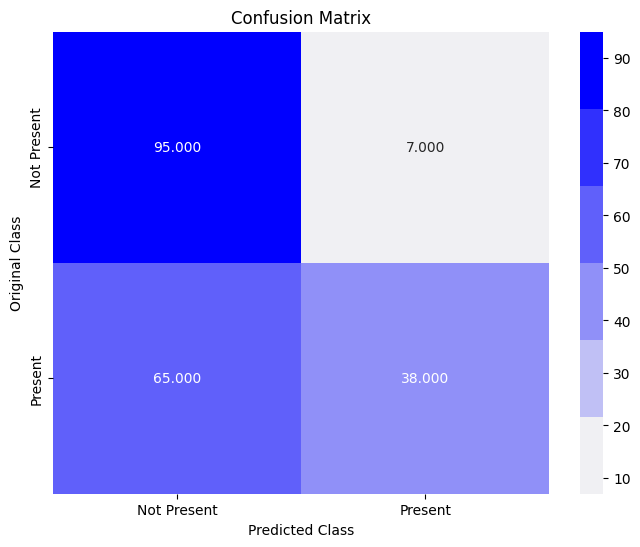


----------------------------------------------------------------------------------------------------
Classification Report:-               precision    recall  f1-score   support

           0       0.59      0.93      0.73       102
           1       0.84      0.37      0.51       103

    accuracy                           0.65       205
   macro avg       0.72      0.65      0.62       205
weighted avg       0.72      0.65      0.62       205

Accuracy Score:- 64.8780487804878
AUC Score:  0.6501522939272797


In [ ]:
# Plotting confusion Matrix and classification report
plot_confusion_matrix(y_test,y_pred)